# Práctica 2: Modelo cinemático inverso de un  y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| ----------- |
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Que son las transformaciones homogéneas?

Matriz de dimensión 4x4 que representa la transformación de un vector de coordenadas homogéneas de un sistema de coordenadas a otro.
Se puede considerar que una matriz homogénea esta compuesta por 4 sub-matrices:

I R3x3, matriz de rotación;

I p3x1, vector de traslación;

I f1x3, transformación de perspectiva; y

I w1x1, escalado global

  Matrices homogéneas de rotación
  
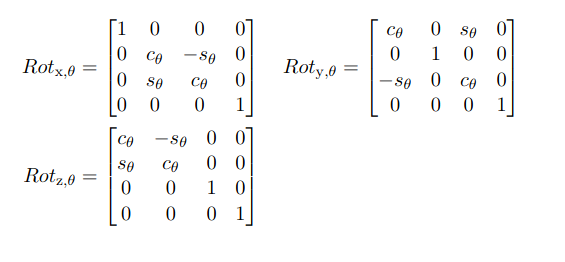

  Matrices homogéneas de traslación

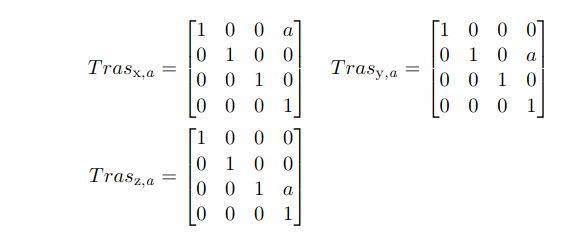
  
  
- ¿Que nos permite obtener el modelo de cinemática inversa de un manipulador?
  
El modelo de cinemática inversa de un manipulador nos permite determina las configuraciones de articulaciones necesarias para que un modelo de robot logre la posición del efector final deseada.
  
- ¿De que formas se puede interpolar la trayectoria de un efector final entre dos puntos?

La cinemática inversa determina las configuraciones de articulaciones necesarias para que un modelo de robot logre la posición del efector final deseada. Las restricciones cinemáticas del robot se especifican en el modelo de robot en función de la transformación entre articulaciones. Puede utilizar la cinemática inversa generalizada para resolver configuraciones que satisfagan restricciones, como una restricción de apuntamiento para un brazo de cámara o un cuadro delimitador cartesiano en el enlace de un determinado cuerpo rígido. 


- ¿Qué es git?

Git es un sistema de control de versiones distribuido, esto es un clon local del proyecto es un repositorio de control de versiones completo. Estos repositorios locales plenamente funcionales permiten trabajar sin conexión o de forma remota con facilidad. Los desarrolladores confirman su trabajo localmente y, a continuación, sincronizan la copia del repositorio con la del servidor.

Funcionamiento básico de git

Cada vez que se guarda el trabajo, Git crea una confirmación. Una confirmación es una instantánea de todos los archivos en un momento dado. Si un archivo no ha cambiado de una confirmación a la siguiente, Git usa el archivo almacenado anteriormente.

  

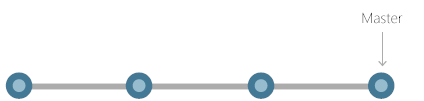

Ramas
  
Cada desarrollador guarda los cambios en su propio repositorio de código local. Git proporciona   herramientas para aislar los cambios y volver a combinarlos posteriormente. Las ramas administran esta separación. Una vez finalizado el trabajo creado en una rama, se puede combinar de nuevo en la rama principal del equipo.
  
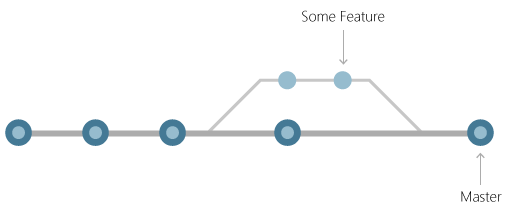

- ¿Qué es github?
  
GitHub es una plataforma donde puedes almacenar, compartir y trabajar junto con otros usuarios para escribir código.

Almacenar tu código en un "repositorio" en GitHub te permite:

  Presentar o compartir el trabajo.
    -Seguir y administrar los cambios en el código a lo largo del tiempo.
    -Dejar que otros usuarios revisen el código y realicen sugerencias para mejorarlo.
    -Colaborar en un proyecto compartido, sin preocuparse de que los cambios afectarán al trabajo de los colaboradores antes de que esté listo para integrarlos.
  
El trabajo colaborativo, una de las características fundamentales de GitHub, es posible gracias al software de código abierto Git, en el que se basa GitHub.
  



## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/P2_IM1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>



In [1]:
###Colocar y correr el código dentro de estas celdas
#!/usr/bin/env python3
import rclpy
from rclpy.node import Node
from std_msgs.msg import String
from sensor_msgs.msg import JointState
from sympy import *
from sympy import solve, Symbol, Matrix, cos, sin, simplify, pi, diff, symbols
import matplotlib
import matplotlib.pyplot as plt
import numpy

dim = (0.3, 0.3, 0.3)
base_dim = (0, 0, 0.1)
base_rot = (pi/2, 0, 0)


def trans_homo(x, y, z, gamma, beta, alpha):
    T = Matrix([[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma)+sin(beta)*cos(alpha)*cos(gamma), x],
         [sin(alpha)*cos(beta), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-sin(gamma)*cos(alpha), y],
        [-sin(beta), sin(gamma)*cos(beta), cos(beta)*cos(gamma), z],[0, 0, 0, 1]])
    return T 

#Parámetros de dimensiones
dim = dim
base_dim = base_dim
base_rot = base_rot
#Variables para cinemática directa
theta_O_1 = Symbol('theta_O_1')
theta_1_2 = Symbol('theta_1_2')
theta_2_3 = Symbol('theta_2_3')
#Grados de libertad
x_O_P = Symbol('x_O_P')
z_O_P = Symbol('y_O_P')
theta_O_P = Symbol('theta_O_P')
#Velocidades
x_O_P_dot = Symbol('x_O_P_dot')
z_O_P_dot = Symbol('y_O_P_dot')
theta_O_P_dot = Symbol('theta_O_P_dot')

#Transformaciones homogéneas
T_O_O = trans_homo(base_dim[0], base_dim[1], base_dim[2], 
                        base_rot[0], base_rot[1], base_rot[2])
T_O_1 = trans_homo(0, 0, 0, 
                        0, 0, theta_O_1)
T_1_2 = trans_homo(dim[0], 0, 0, 
                        0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 
                        0, 0, theta_2_3)
T_3_P = trans_homo(dim[2], 0, 0, 
                        0, 0, 0)
T_O_P = simplify(T_O_O * T_O_1 * T_1_2 * T_2_3 * T_3_P)
print("GDL del robot")
print("\nT_O_P[0,3]:")
print(T_O_P[0,3])
print("\nT_O_P[1,3]:")
print(T_O_P[1,3])
print("\nT_O_P[2,3]:\n")
print(T_O_P[2,3])
print("\nT_O_P:")
print(T_O_P)
xi_O_P = Matrix([T_O_P[0, 3], T_O_P[2, 3], 
                      theta_O_1 + theta_1_2 + theta_2_3])
J = Matrix.hstack(diff(xi_O_P, theta_O_1), 
                       diff(xi_O_P, theta_1_2), 
                       diff(xi_O_P, theta_2_3))
J_inv = J.inv()
print("\nJACOBIANO:")
print(J)


GDL del robot

T_O_P[0,3]:
0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)

T_O_P[1,3]:
0

T_O_P[2,3]:

0.3*sin(theta_O_1) + 0.3*sin(theta_1_2 + theta_O_1) + 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1) + 0.1

T_O_P:
Matrix([[cos(theta_1_2 + theta_2_3 + theta_O_1), -sin(theta_1_2 + theta_2_3 + theta_O_1), 0, 0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)], [0, 0, -1, 0], [sin(theta_1_2 + theta_2_3 + theta_O_1), cos(theta_1_2 + theta_2_3 + theta_O_1), 0, 0.3*sin(theta_O_1) + 0.3*sin(theta_1_2 + theta_O_1) + 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1) + 0.1], [0, 0, 0, 1]])

JACOBIANO:
Matrix([[-0.3*sin(theta_O_1) - 0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_2_3 + theta_O_1)], [0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_

### 2. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [7]:
###Colocar y correr el código dentro de estas celdas
frec = 30
time = (0, 3)

#POsiciones Iniciales y finales 
#gdl_in = (0.8, 0.1, 0)
ws_in= [1.57, 1.57, 1.57]
T_O_P_subs = T_O_P.subs({
    theta_O_1: ws_in[0],
    theta_1_2: ws_in[1],
    theta_2_3: ws_in[2]
})
gdl_in = (T_O_P_subs[0, 3], T_O_P_subs[1, 3], T_O_P_subs[2, 3])
gdl_fn = (-0.4, 0, 0.15)
print(gdl_in)
frec = frec
a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')
lam = a_0 + a_1*t + a_2*(t**2) + a_3*(t**3) + a_4*(t**4) + a_5*(t**5)
lam_dot = diff(lam, t)
lam_dot_dot = diff(lam_dot, t)
terms = solve([
  lam.subs(t, time[0]) - 0,
  lam.subs(t, time[1]) - 1,
  lam_dot.subs(t, time[0]) - 0,
  lam_dot.subs(t, time[1]) - 0,
  lam_dot_dot.subs(t, time[0]) - 0,
  lam_dot_dot.subs(t, time[1]) - 0
], [a_0, a_1, a_2, a_3, a_4, a_5], dict = True)
print(terms)
#Lamda con valores sustituidos
lam_s = lam.subs(terms[0])
lam_s_dot = lam_dot.subs(terms[0])
lam_s_dot_dot = lam_dot_dot.subs(terms[0])
samples = frec * (time[1] - time[0]) + 1
dt = 1.0 / frec

#Creando arreglos para guardar las posiciones de los grados de libertad
gdl = []
gdl_dot = []
gdl_dot_dot = []
for a in range(samples):
  gdl.append((gdl_in[0] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
              gdl_in[1] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]),
              gdl_in[2] + lam_s.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2])))
  gdl_dot.append((lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
                  lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]),
                  lam_s_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2])))
  gdl_dot_dot.append((lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[0] - gdl_in[0]),
                      lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[1] - gdl_in[1]),
                      lam_s_dot_dot.subs(t, time[0] + float(a)/frec) * (gdl_fn[2] - gdl_in[2])))
  
#Obteniendo posiciòn inicial del ws 
xi_desp = xi_O_P - Matrix([gdl_in[0], 
                                      gdl_in[1], 
                                      gdl_in[2]])
print("Calculando posiciones iniciales")
"""q_in = solve([xi_desp],
              [theta_O_1, 
              theta_1_2, 
              theta_2_3])
print("Posiciones iniciales")
print(q_in)"""
"""for i in q_in:
  if i[0]>0:
    q_in_def = i
    break"""
q_in_def = (0.585685543457151, 
        -1.17137108691430, 
        0.585685543457151)

#print(q_in_def)
#Calculando velocidad inicial
xi_O_P_dot = Matrix([x_O_P_dot,
                          z_O_P_dot, 
                          theta_O_P_dot])
q_O_P_dot = J_inv * xi_O_P_dot
#Arreglos para guardar las posiciones del ws
ws = []
ws_dot = []
ws_dot_dot = []
#Agregando posiciòn inicial
ws.append(q_in_def)
#Agregando velocidad inicial
q_dot_in = q_O_P_dot.subs({
  x_O_P_dot:      gdl_dot[0][0],
  z_O_P_dot:      gdl_dot[0][1],
  theta_O_P_dot:  gdl_dot[0][2],
  theta_O_1:      ws[0][0],
  theta_1_2:      ws[0][1],
  theta_2_3:      ws[0][2]})
ws_dot.append(q_dot_in)

(-0.300477414938726, 0, 0.100478556838181)
[{a_0: 0, a_1: 0, a_2: 0, a_3: 10/27, a_4: -5/27, a_5: 2/81}]
Calculando posiciones iniciales


### 3. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

Iteraciòn: 0
Iteraciòn: 1
Iteraciòn: 2
Iteraciòn: 3
Iteraciòn: 4
Iteraciòn: 5
Iteraciòn: 6
Iteraciòn: 7
Iteraciòn: 8
Iteraciòn: 9
Iteraciòn: 10
Iteraciòn: 11
Iteraciòn: 12
Iteraciòn: 13
Iteraciòn: 14
Iteraciòn: 15
Iteraciòn: 16
Iteraciòn: 17
Iteraciòn: 18
Iteraciòn: 19
Iteraciòn: 20
Iteraciòn: 21
Iteraciòn: 22
Iteraciòn: 23
Iteraciòn: 24
Iteraciòn: 25
Iteraciòn: 26
Iteraciòn: 27
Iteraciòn: 28
Iteraciòn: 29
Iteraciòn: 30
Iteraciòn: 31
Iteraciòn: 32
Iteraciòn: 33
Iteraciòn: 34
Iteraciòn: 35
Iteraciòn: 36
Iteraciòn: 37
Iteraciòn: 38
Iteraciòn: 39
Iteraciòn: 40
Iteraciòn: 41
Iteraciòn: 42
Iteraciòn: 43
Iteraciòn: 44
Iteraciòn: 45
Iteraciòn: 46
Iteraciòn: 47
Iteraciòn: 48
Iteraciòn: 49
Iteraciòn: 50
Iteraciòn: 51
Iteraciòn: 52
Iteraciòn: 53
Iteraciòn: 54
Iteraciòn: 55
Iteraciòn: 56
Iteraciòn: 57
Iteraciòn: 58
Iteraciòn: 59
Iteraciòn: 60
Iteraciòn: 61
Iteraciòn: 62
Iteraciòn: 63
Iteraciòn: 64
Iteraciòn: 65
Iteraciòn: 66
Iteraciòn: 67
Iteraciòn: 68
Iteraciòn: 69
Iteraciòn: 70
Iteraciòn: 71
It

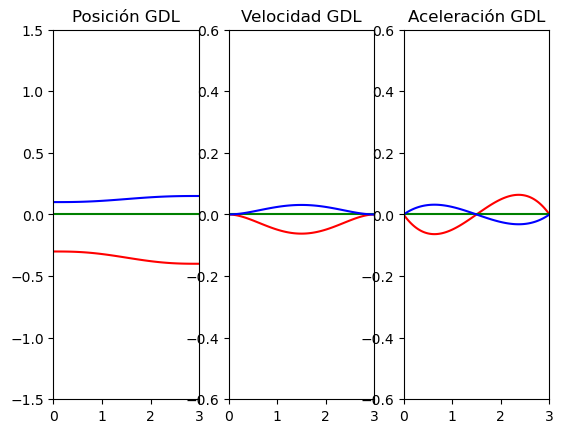

In [8]:
###Colocar y correr el código dentro de estas celdas
#Calculando todos los valores por cinemàtica inversa
for a in range(samples - 1):
  #Posiciòn
  ws.append((ws[a][0] + ws_dot[a][0] * dt,
             ws[a][1] + ws_dot[a][1] * dt,
             ws[a][2] + ws_dot[a][2] * dt))
  #Velocidad
  q_dot_iter = q_O_P_dot.subs({
  x_O_P_dot:      gdl_dot[a+1][0],
  z_O_P_dot:      gdl_dot[a+1][1],
  theta_O_P_dot:  gdl_dot[a+1][2],
  theta_O_1:      ws[a+1][0],
  theta_1_2:      ws[a+1][1],
  theta_2_3:      ws[a+1][2]})
  ws_dot.append(q_dot_iter)
  #Aceleraciòn
  ws_dot_dot.append((
                    (ws_dot[a+1][0] - ws_dot[a][0]) / dt,
                    (ws_dot[a+1][1] - ws_dot[a][1]) / dt,
                    (ws_dot[a+1][2] - ws_dot[a][2]) / dt
                    ))
  print("Iteraciòn: "  + str(a))
#Aceleraciòn final
ws_dot_dot.append((0,0,0))
gdl = gdl
gdl_dot = gdl_dot
gdl_dot_dot = gdl_dot_dot
ws = ws
ws_dot = ws_dot
ws_dot_dot = ws_dot_dot

#Grados de libertad
gdl_t = []
gdl_p_0 = []
gdl_p_1 = []
gdl_p_2 = []
gdl_v_0 = []
gdl_v_1= []
gdl_v_2 = []
gdl_a_0 = []
gdl_a_1 = []
gdl_a_2 = []

for i in range(len(gdl)):
  gdl_t.append(float(i) / frec)
  gdl_p_0.append(gdl[i][0])
  gdl_p_1.append(gdl[i][1])
  gdl_p_2.append(gdl[i][2])
  gdl_v_0.append(gdl_dot[i][0])
  gdl_v_1.append(gdl_dot[i][1])
  gdl_v_2.append(gdl_dot[i][2])
  gdl_a_0.append(gdl_dot_dot[i][0])
  gdl_a_1.append(gdl_dot_dot[i][1])
  gdl_a_2.append(gdl_dot_dot[i][2])

fig, ((gdl_plot, gdl_dot_plot, gdl_dot_dot_plot)) = plt.subplots(nrows = 1, ncols = 3)  

#Gráficas GDL
gdl_plot.set_title("Posición GDL")
gdl_plot.axis((0, 3, -1.5, 1.5))
gdl_plot.plot(gdl_t, gdl_p_0, color = "RED")
gdl_plot.plot(gdl_t, gdl_p_1, color = "GREEN")
gdl_plot.plot(gdl_t, gdl_p_2, color = "BLUE")
gdl_dot_plot.set_title("Velocidad GDL")
gdl_dot_plot.axis((0, 3, -0.6, 0.6))
gdl_dot_plot.plot(gdl_t, gdl_v_0, color = "RED")
gdl_dot_plot.plot(gdl_t, gdl_v_1, color = "GREEN")
gdl_dot_plot.plot(gdl_t, gdl_v_2, color = "BLUE")
gdl_dot_dot_plot.set_title("Aceleración GDL")
gdl_dot_dot_plot.axis((0, 3, -0.6, 0.6))
gdl_dot_dot_plot.plot(gdl_t, gdl_a_0, color = "RED")
gdl_dot_dot_plot.plot(gdl_t, gdl_a_1, color = "GREEN")
gdl_dot_dot_plot.plot(gdl_t, gdl_a_2, color = "BLUE")

plt.show()

### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

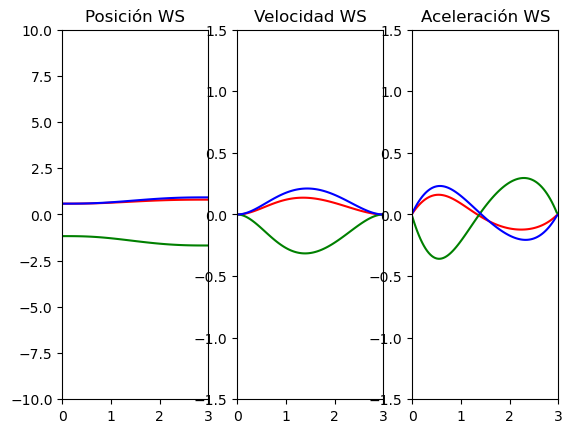

In [9]:
###Colocar y correr el código dentro de estas celdas
#Espacio de trabajo
ws_t = []
ws_p_0 = []
ws_p_1 = []
ws_p_2 = []
ws_v_0 = []
ws_v_1= []
ws_v_2 = []
ws_a_0 = []
ws_a_1 = []
ws_a_2 = []

for i in range(len(ws)):
  ws_t.append(float(i) / frec)
  ws_p_0.append(ws[i][0])
  ws_p_1.append(ws[i][1])
  ws_p_2.append(ws[i][2])
  ws_v_0.append(ws_dot[i][0])
  ws_v_1.append(ws_dot[i][1])
  ws_v_2.append(ws_dot[i][2])
  ws_a_0.append(ws_dot_dot[i][0])
  ws_a_1.append(ws_dot_dot[i][1])
  ws_a_2.append(ws_dot_dot[i][2])
    
fig, ((ws_plot, ws_dot_plot, ws_dot_dot_plot)) = plt.subplots(nrows = 1, ncols = 3)  


#Gráficas WS
ws_plot.set_title("Posición WS")
ws_plot.axis((0, 3, -10, 10))
ws_plot.plot(ws_t, ws_p_0, color = "RED")
ws_plot.plot(ws_t, ws_p_1, color = "GREEN")
ws_plot.plot(ws_t, ws_p_2, color = "BLUE")

ws_dot_plot.set_title("Velocidad WS")
ws_dot_plot.axis((0, 3, -1.5, 1.5))
ws_dot_plot.plot(ws_t, ws_v_0, color = "RED")
ws_dot_plot.plot(ws_t, ws_v_1, color = "GREEN")
ws_dot_plot.plot(ws_t, ws_v_2, color = "BLUE")
ws_dot_dot_plot.set_title("Aceleración WS")
ws_dot_dot_plot.axis((0, 3, -1.5, 1.5))
ws_dot_dot_plot.plot(ws_t, ws_a_0, color = "RED")
ws_dot_dot_plot.plot(ws_t, ws_a_1, color = "GREEN")
ws_dot_dot_plot.plot(ws_t, ws_a_2, color = "BLUE")
plt.show()

### 5. Github
Para terminar, crear un repositorio en línea en gihub, donde se subirán los archivos de la práctica. 
Se recomienda primero crear el repositorio en línea, clonarlo en el ordenador y después incluir los archivos de la práctica. 
Para utilizar el repositorio para todas las prácticas posteriores, se recomienda usar la siguiente estructura de archivos:
~~~ bash
repositorio_practicas/
├── practica_2
│   ├── imagenes
│   │   └── P2_IM1.png
│   └── Practica_2.ipynb
└── README.md
~~~
Dentro del archivo README.md (Creado de forma automática en el repositorio en línea), colocar los nombres de los integrantes del equipo.

## Análisis de resultados

¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> Es muy util cuando se quiere lograr una posición final deseada, dando más precisión y menos error a la hora de determinar el movimiento de la cadena de articulaciones. Esto es esencial en robots como el que estamos creando que requiere de una precisión en la trayectoria a realizar.

¿Controlar las condiciones iniciales y finales de la trayectoria del efector final tiene un efecto en las condiciones inicial y final de las juntas?
> Sí, al usar cinematica inversa, se relaciona directamente el efector final con las juntas,al traducir todos las posiciones a  configuraciones articulares, ya que cualquier cambio en la velocidad, orientación, posición o aceleración afecta a estas juntas. Así mismo, si se requiere llegar a una condición final, las juntas deben calcularse de cierta manera junto con sus condiciones iniciales, configurándose directamente y teniendo que recalcular la trayectoria si se llega a requerir otra condición final.

¿Qué utilidad tiene el uso de un repositorio en línea para código?
> Permite poder visualizar y descargar directamente los archivos, facilitando la colaboración, y el mejor entendimiento del código, también es util para poder administrar los permisos de acceso al código, así como también el acceso a los cambios que puedan realizarse, siendo que esto ayuda cuando se quiere compartir o dar a entender de manera directa algún archivo o carpeta de algún proyecto.




## Conclusiones

Al concluir esta práctica, se completó el objetivo, al utilizar cinemática directa e inversa, se logra determinar las posiciones especificas del robot, permitiendo comprender de mejor manera la creación e interpretación de un archivo URDF, al calcular el jacobiano del extremo del robot respecto a las variables de las articulaciones, facilita los análisis a realizar, la integración de ROS 2 añade flexibilidad y permite la aplicación en tiempo real. Para la trayectoria se tomaron los valores de gdl_in a partir de la matriz de transformación total (T_O_P) y se definió gdl_fn en el intervalo que se muestra en el programa, debido a que al utilizar valores mayores, se presentaban indeterminaciones. 
Todo esto en conjunto  representa una solución para el control y planificación de movimientos en un robot manipulador con tres grados de libertad.

## Bibliografía 


R. F. MendozaGarcia. “Fundamentos de Robótica Herramientas Matemáticas para la Localización Espacial Matrices de Transformación Homogéneas”. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: http://www.eudim.uta.cl/rmendozag/courses/fundamentos_robotica/lectures/matrices_homogeneas.pdf

A. Gutiérrez Giles. “Transformaciones Homogéneas”. INAOE. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: https://ccc.inaoep.mx/~alejandro.giles/assets/pdf/04-transformaciones_homogeneas.pdf

“Cinemática inversa- MATLAB & Simulink- MathWorks España”. MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: https://es.mathworks.com/help/robotics/inverse-kinematics.html

“¿Qué es Git?” Microsoft Learn: Build skills that open doors in your career. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: https://learn.microsoft.com/es-es/devops/develop/git/what-is-git

“Acerca de GitHub y Git - Documentación de GitHub”. GitHub Docs. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: https://docs.github.com/es/get-started/start-your-journey/about-github-and-git

“Acerca de los repositorios - Documentación de GitHub”. GitHub Docs. Accedido el 8 de noviembre de 2024. [En línea]. Disponible: https://docs.github.com/es/repositories/creating-and-managing-repositories/about-repositories 

“Trazar la trayectoria de un efector final con cinemática inversa en Simulink- MATLAB & Simulink- MathWorks América Latina”. MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. Accedido el 10 de noviembre de 2024. [En línea]. Disponible: https://la.mathworks.com/help/robotics/ug/trace-end-effector-ik-simulink.html
